In [24]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data_headers = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv('E:\Документы/УЧЕБА/МАГА/1 семестр/Демидова/3_4/glass.data', names=data_headers)

In [4]:
data.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
ss = StandardScaler()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(data.iloc[:,1:-1]), 
                                                    data.iloc[:,-1],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=data.iloc[:,-1],
                                                    random_state=322)

# Поиск оптимальных параметров SVM

По умолчанию я буду использовать тип ядра **_rbf_**, так как в предыдущих практиках он показывал лучший результат

Так же для поиска наилучших параметров обучения будем использовать **_генетический алгоритм_**, так как он показал себя лучше роя частиц в части B

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from geneticalgorithm import geneticalgorithm

In [17]:
def func(X):
    # Обучение модели
    svm = SVC(kernel='rbf',
              C=X[0], 
              gamma=X[1]).fit(X_train, y_train)
    # Предсказание на тестовых данных
    pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    # Возвращаем значение с минусом для максимизации функции
    return -accuracy
    

In [18]:
varbound = np.array([[1,20], [0.001, 1.0]])

 The best solution found:                                                                           
 [3.73548617 0.04230833]

 Objective function:
 -0.7846153846153846


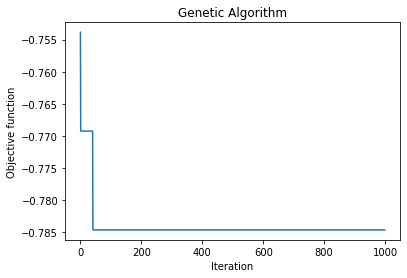

Время выполнения 162.13698053359985


In [19]:
model = geneticalgorithm(function=func, 
                         dimension=2, 
                         variable_type='real',
                         variable_boundaries=varbound)
time_start = time.time()
model.run()
time_end = time.time()
print('Время выполнения {}'.format(time_end-time_start))

In [20]:
svm_default = SVC(kernel='rbf').fit(X_train, y_train)

In [22]:
pred_default = svm_default.predict(X_test)
accuracy_default = accuracy_score(y_test, pred_default)

Test accuracy
Default parameters: 0.7538461538461538
Genetic Algorithm's parameters: 0.7846153846153846


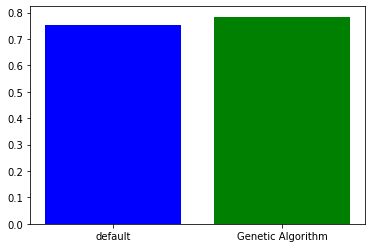

In [29]:
accuracy_data = [accuracy_default, -model.best_function]
axis = ['default', 'Genetic Algorithm']
plt.bar(axis, accuracy_data, color=['blue', 'green'])
print("Test accuracy\nDefault parameters: {}\nGenetic Algorithm's parameters: {}".format(accuracy_default, -model.best_function))


**Вывод**: Благодаря генетическому алгоритму оптимизации удалось увеличить значение точности предсказания на тестовых данных, по сравнению с стандартными значениями 

# Поиск оптимальных параметров KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

По умолчанию я буду использовать метрику **_manhattan_**, и весовую функцию **_distance_** так как в предыдущих практиках они показывали лучший результат

Так же для поиска наилучших параметров обучения будем использовать **_генетический алгоритм_**, так как он показал себя лучше роя частиц в части B

In [64]:
def func_2(X):
    # Обучение модели
    knn = KNeighborsClassifier(metric='manhattan',
                               weights='distance',
                               n_neighbors=int(X[0]),
                               leaf_size=int(X[1]),
                               p=int(X[2])).fit(X_train, y_train)
    # Предсказание на тестовых данных
    pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    # Возвращаем значение с минусом для максимизации функции
    return -accuracy

In [65]:
varbound = np.array([[1,100],[1, 100],[1, 20]],dtype=np.int32)

 The best solution found:                                                                           
 [11. 83. 20.]

 Objective function:
 -0.7230769230769231


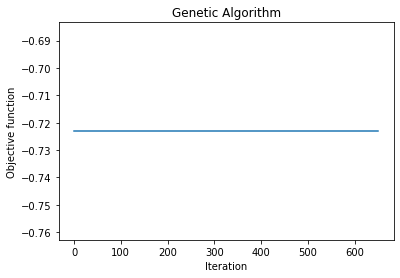

Время выполнения 64.92267441749573


In [66]:
model = geneticalgorithm(function=func_2, 
                         dimension=3, 
                         variable_type='int',
                         variable_boundaries=varbound)
time_start = time.time()
model.run()
time_end = time.time()
print('Время выполнения {}'.format(time_end-time_start))

In [67]:
knn_default = KNeighborsClassifier(metric='manhattan',
                                   weights='distance').fit(X_train, y_train)

In [68]:
pred_default = knn_default.predict(X_test)
accuracy_default = accuracy_score(y_test, pred_default)

Test accuracy
Default parameters: 0.6461538461538462
Genetic Algorithm's parameters: 0.7230769230769231


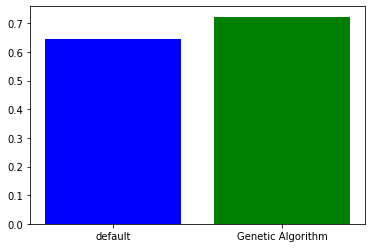

In [69]:
accuracy_data = [accuracy_default, -model.best_function]
axis = ['default', 'Genetic Algorithm']
plt.bar(axis, accuracy_data, color=['blue', 'green'])
print("Test accuracy\nDefault parameters: {}\nGenetic Algorithm's parameters: {}".format(accuracy_default, -model.best_function))


**Вывод**: Благодаря генетическому алгоритму оптимизации удалось увеличить значение точности предсказания на тестовых данных, по сравнению с стандартными значениями

# Поиск оптимальных параметров RF

In [70]:
from sklearn.ensemble import RandomForestClassifier

По умолчанию я буду использовать критерий **_entropy_**, max_features='auto' , bootstrap=False так как в предыдущих практиках они показывали лучший результат

Так же для поиска наилучших параметров обучения будем использовать **_генетический алгоритм_**, так как он показал себя лучше роя частиц в части B

In [71]:
def func_3(X):
    # Обучение модели
    rf = RandomForestClassifier(criterion='entropy',
                                bootstrap=False,
                                n_estimators=int(X[0]),
                                max_depth = int(X[1]),
                                min_samples_split = int(X[2])/100.0,
                                min_samples_leaf = int(X[3])).fit(X_train, y_train)
    # Предсказание на тестовых данных
    pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    # Возвращаем значение с минусом для максимизации функции
    return -accuracy

In [72]:
varbound = np.array([[1,50],[1, 50],[1, 100],[1,50]],dtype=np.int32)

 The best solution found:                                                                           
 [34. 14.  8.  1.]

 Objective function:
 -0.8769230769230769


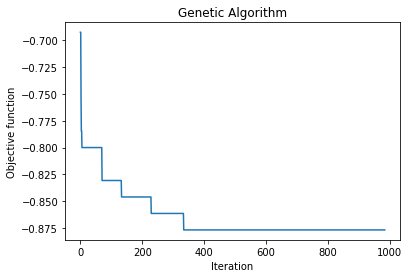

Время выполнения 1794.0552244186401


In [73]:
model = geneticalgorithm(function=func_3, 
                         dimension=4, 
                         variable_type='int',
                         variable_boundaries=varbound)
time_start = time.time()
model.run()
time_end = time.time()
print('Время выполнения {}'.format(time_end-time_start))

In [74]:
rf_default = RandomForestClassifier(criterion='entropy',
                                    bootstrap=False,).fit(X_train, y_train)

In [75]:
pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, pred_default)

Test accuracy
Default parameters: 0.8153846153846154
Genetic Algorithm's parameters: 0.8769230769230769


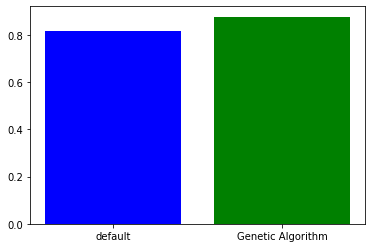

In [76]:
accuracy_data = [accuracy_default, -model.best_function]
axis = ['default', 'Genetic Algorithm']
plt.bar(axis, accuracy_data, color=['blue', 'green'])
print("Test accuracy\nDefault parameters: {}\nGenetic Algorithm's parameters: {}".format(accuracy_default, -model.best_function))


**Вывод**: Благодаря генетическому алгоритму оптимизации удалось увеличить значение точности предсказания на тестовых данных, по сравнению с стандартными значениями